Background: McCurr Consultancy is an MNC that has thousands of employees spread across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives.

Objective: To predict if an employee is going to attrite or not

Key Questions:
1. Which are the different factors that drive attrition?
2. What factors have no effect on attrition?
3. What is the accuracy of the prediction using the model?
4. Which algorithm gives the best accuracy?

Guideline:
##1. Visualize some of the variables individually to better understand the variables at your disposal
i was able to visualize the relationship of the variables of age and total working years, monthly income and total working years,
job level and total monthly income, year in company and year since promotion to know the value of how the incentive will be pass among the staff 
##2. Visualize pairs of variables to better understand the correlation between the features and the target variables
iwas able to use Attrition as my features and target to evaluate and to build my model into three types: which is training, validation and testing set. 
    
##3. Divide the data into Training and Testing datasets (70:30) and build predictive models using Logistic Regression, Decision Trees and Random Forest algorithms.
i used the minmaxscaler to fit and transform my model. and then make my dataset 70:30. at this time i use my logistic regression and my output
    for training set is 0.8584 and on validation is 0.8551. then on random forest my training set is 0.9885 and validation is 0.9040.
    o regularize by using hyperparameters then my training set is 0.8578 and validation is 0.8551. 
##5. Compare the models using Model Performance Measures and comment on the findings
i use =d model performance measures by using the confusion matrix and recall score. this is the result i have
confusion matrix:     
[[604   6]
 [108  17]]
recall_score: 
0.136
##6. Tune the models and comment on how this helped in increasing the accuracy




In [63]:
import pandas as pd 
import imblearn
from imblearn.over_sampling import SMOTE

path =r'C:\Users\USER\Desktop\Attrition Project\HR_Employee_Attrition_Dataset.csv'

data = pd.read_csv(path)

In [64]:
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [65]:
#check dimension
data.shape

(2940, 35)

In [66]:
data.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [67]:
#check correlation 

data.corr()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,1.000000,-0.005175,-0.025742,0.016464,0.020950,NaN,0.008712,0.017377,-0.003552,-0.009020,...,-0.034827,NaN,0.031226,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004575,-0.004716
Age,-0.005175,1.000000,0.010661,-0.001686,0.208034,NaN,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.025742,0.010661,1.000000,-0.004985,-0.016806,NaN,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.016464,-0.001686,-0.004985,1.000000,0.021042,NaN,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.020950,0.208034,-0.016806,0.021042,1.000000,NaN,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.008712,0.010146,0.018355,-0.016075,-0.027128,NaN,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.017377,0.024287,0.023381,0.031131,0.016775,NaN,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.003552,0.029820,0.046135,0.008783,0.042438,NaN,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,-0.009020,0.509604,0.002966,0.005303,0.101589,NaN,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [68]:
#ploting the correlation to see clearly which of the variables has the highest values

plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(data.corr(), annot=True, fmt='.0%')

NameError: name 'sns' is not defined

<Figure size 1008x1008 with 0 Axes>

In [69]:
#checking the value counts of attrition to know, the number of the staff that stay after reducing their incentive and those who stay 
data["Attrition"].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

# PLOT A SCATTER GRAPH TO KNOW THE RELATIONSHIP BETWEEN THE FEATURES THAT HAS THE HIGH VALUES

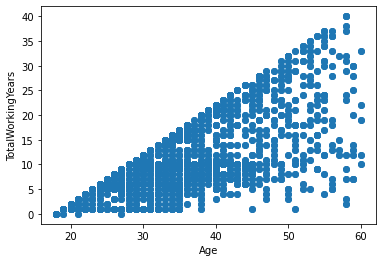

In [70]:
import matplotlib.pyplot as plt
plt.scatter(data['Age'], data['TotalWorkingYears'],)
plt.xlabel('Age')
plt.ylabel('TotalWorkingYears')
plt.show()

This plot shows the relationship in the company with the number of years they have spent in the company 
meanwhile from the plot some left, maybe because of the low incentive given to them. 
while some still in the company and still working with the little incentive given to them


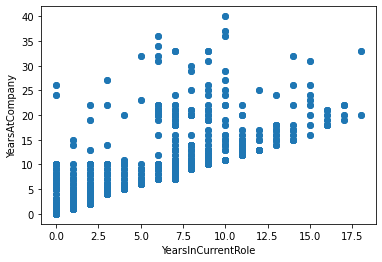

In [71]:
import matplotlib.pyplot as plt
plt.scatter(data['YearsInCurrentRole'], data['YearsAtCompany'],)
plt.xlabel('YearsInCurrentRole')
plt.ylabel('YearsAtCompany')
plt.show()

the plot explained the relationship between the years in current roles and the years of stay in the company. 
the plot shows that man have been in a role for long and letter where change. and some have changed and also was returned back
to the same roles
like someone who has spent 40 years in the company, he/she has be simutaneously changing from one job rotation to the other
he/she will have a wide scope of the job. but some have not be chnaged or maybe they dont want to be changed. 

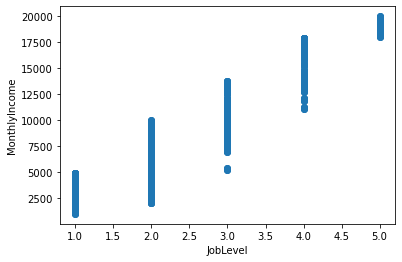

In [72]:
import matplotlib.pyplot as plt
plt.scatter(data['JobLevel'], data['MonthlyIncome'],)
plt.xlabel('JobLevel')
plt.ylabel('MonthlyIncome')
plt.show()

This plot explained the correlation between the monthly income and the joblevel. the higher the joblevel,
the higher the monthly income.
we can see from plot that last level in company, get the highest pay in the company. 

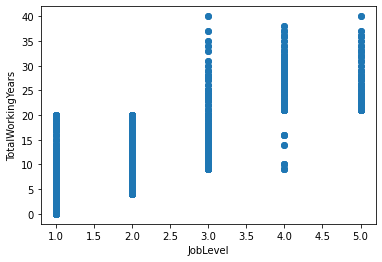

In [73]:
import matplotlib.pyplot as plt
plt.scatter(data['JobLevel'], data['TotalWorkingYears'],)
plt.xlabel('JobLevel')
plt.ylabel('TotalWorkingYears')
plt.show()

This plot explained the relationship between the joblevel and total working years staff have use.

some have been in the same level of job without been change, maybe no promotion was given to them. 

maybe they are not proactive in their level of job. While we see little change of joblevels in between. 

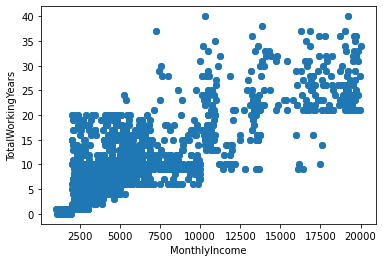

In [74]:
import matplotlib.pyplot as plt
plt.scatter(data['MonthlyIncome'], data['TotalWorkingYears'],)
plt.xlabel('MonthlyIncome')
plt.ylabel('TotalWorkingYears')
plt.show()

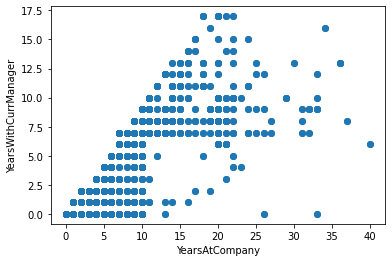

In [75]:
import matplotlib.pyplot as plt
plt.scatter(data['YearsAtCompany'], data['YearsWithCurrManager'],)
plt.xlabel('YearsAtCompany')
plt.ylabel('YearsWithCurrManager')
plt.show()

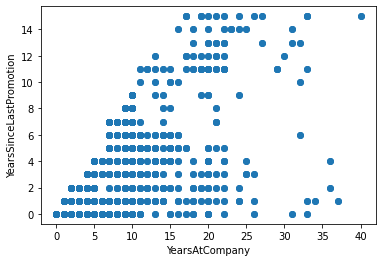

In [76]:
import matplotlib.pyplot as plt
plt.scatter(data['YearsAtCompany'], data['YearsSinceLastPromotion'],)
plt.xlabel('YearsAtCompany')
plt.ylabel('YearsSinceLastPromotion')
plt.show()

# let’s prepare the data for the model. We will first transform non-numeric columns to numerical columns.

In [77]:
data['BusinessTravel']= pd.get_dummies(data['BusinessTravel'], drop_first=True)

In [78]:
data['Gender'] = pd.get_dummies(data['Gender'], drop_first=True)

In [79]:
data['Attrition'] = pd.get_dummies(data['Attrition'], drop_first=True)

In [80]:
data['JobRole'] = pd.get_dummies(data['JobRole'], drop_first=True)

In [81]:
#check the head 
data.head(50)

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,41,0,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,0,49,1,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,1,37,0,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,0,33,1,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,0,27,0,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,0,32,1,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,7,0,59,0,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,8,0,30,0,1358,Research & Development,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,9,0,38,1,216,Research & Development,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,10,0,36,0,1299,Research & Development,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


# Dropping those variables that dont have relationship and they are not useful.

In [82]:
bat = data.drop(['Department', 'EducationField', 'MaritalStatus','OverTime', 'Over18'], axis = 1)

In [83]:
#check the head 
bat.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,41,0,1102,1,2,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,2,0,49,1,279,8,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,3,1,37,0,1373,2,2,1,4,1,...,2,80,0,7,3,3,0,0,0,0
3,4,0,33,1,1392,3,4,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,5,0,27,0,591,2,1,1,1,1,...,4,80,1,6,3,3,2,2,2,2


In [84]:
#check the dtypes to know if there is still features in object
bat.dtypes

EmployeeNumber              int64
Attrition                   uint8
Age                         int64
BusinessTravel              uint8
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      uint8
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     uint8
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrM

In [85]:
#we split the attrition into features and our target 
features = bat.drop('Attrition', axis=1)
target = bat['Attrition']

In [86]:
target.value_counts()

0    2466
1     474
Name: Attrition, dtype: int64

In [87]:
smote = SMOTE()

features_smote, target_smote = smote.fit_resample(features, target)

In [88]:
target_smote.value_counts()

1    2466
0    2466
Name: Attrition, dtype: int64

# Splitting into our training and testing set

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features_smote, target_smote, test_size = 0.25, random_state = 0)
X_train, x_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state = 0)

In [90]:
#check the shape of the x_train and x_test and x_val

X_train.shape, X_test.shape, x_val.shape

((2774, 29), (1233, 29), (925, 29))

In [91]:
#we show the minmaxscaler 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()

X_train_std = scaler.fit_transform(X_train)
x_val_std = scaler.transform(x_val)
X_test_std = scaler.transform(X_test)

In [93]:
 #Import Random Forest To Classifer you model
from sklearn.ensemble import RandomForestClassifier
forest =RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
forest.fit(X_train_std,Y_train)
print("Train accuracy: {:.4f}".format(forest.score(X_train_std, Y_train)))
print("Validation accuracy: {:.4f}".format(forest.score(x_val_std, Y_val)))

Train accuracy: 0.9964
Validation accuracy: 0.9222


In [95]:
#import decisiontree to check the accuracy 
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train_std, Y_train)
print("Train accuracy: {:.4f}".format(tree.score(X_train_std, Y_train)))
print("Validation accuracy: {:.4f}".format(tree.score(x_val_std, Y_val))) 

Train accuracy: 1.0000
Validation accuracy: 0.9135


In [97]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_std, Y_train)
print("Train accuracy: {:.4f}".format(logreg.score(X_train_std, Y_train)))
print("Validation accuracy: {:.4f}".format(logreg.score(x_val_std, Y_val)))

Train accuracy: 0.8140
Validation accuracy: 0.8097


In [105]:

logreg1 = LogisticRegression (C= 0.8)

logreg1.fit(X_train_std, Y_train)
print("Train accuracy: {:.4f}".format(logreg1.score(X_train_std, Y_train)))
print("Validation accuracy: {:.4f}".format(logreg1.score(x_val_std, Y_val)))

Train accuracy: 0.8140
Validation accuracy: 0.8097


In [106]:
#Model Performance Measures 
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, confusion_matrix

y_pred = forest.predict(X_test_std)

conf = confusion_matrix(Y_test, y_pred)

class_report = classification_report(Y_test, y_pred)

recall = recall_score(Y_test, y_pred)

precision = precision_score(Y_test, y_pred)   

fmeasure = f1_score(Y_test, y_pred)

In [107]:
print("confusion matrix: \n{}".format(conf))

confusion matrix: 
[[554  57]
 [ 50 572]]


In [108]:
print("recall_score: \n{}".format(recall))

recall_score: 
0.9196141479099679


In [109]:
print("classification_report: \n{}".format(class_report))

classification_report: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       611
           1       0.91      0.92      0.91       622

    accuracy                           0.91      1233
   macro avg       0.91      0.91      0.91      1233
weighted avg       0.91      0.91      0.91      1233



In [59]:
#from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train_std, Y_train)
#print("Train accuracy: {:.4f}".format(knn.score(X_train_std, Y_train)))
#print("Validation accuracy: {:.4f}".format(knn.score(x_val_std, Y_val)))

In [117]:
import pickle
import joblib

In [121]:
filename = 'forest.pkl'

file = open(filename, 'wb')
pickle.dump(logreg, file)
file.close()

In [122]:
file = open('forest.pkl', 'rb')
model = pickle.load(file)
file.close()

In [123]:
model.score(X_test_std, Y_test)
model.predict(X_test_std)

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)